# Handling Missing Data in Datasets

This notebook demonstrates various techniques for handling missing data in datasets, including deletion methods and imputation techniques using pandas and scikit-learn.

**Learning Objectives:**
- Understand different approaches to handle missing data
- Learn deletion and imputation techniques
- Compare mean imputation vs KNN imputation
- Visualize data tables with missing values

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas and NumPy
- Understanding of data preprocessing concepts

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

## Step 1: Define Table Rendering Function

We'll create a helper function to display DataFrames as nicely formatted tables.

In [2]:
def render_mpl_table(
        data: pd.DataFrame, col_width: float = 4.0, row_height: float = 0.625,
        font_size: int = 14, header_color: str = "#179E86",
        row_colors: list = ["#f1f1f2", "#ffffff"], edge_color: str = "black",
        bbox: list = [0, 0, 1, 1], header_font_color: str = "white",
        ax: plt.Axes = None, **kwargs) -> plt.Axes:
    """Function to display the DataFrame as a table with colored cells.

    Args:
        data (pd.DataFrame): The DataFrame to be displayed as a table.
        col_width (float, optional): The width of the columns. Defaults to 4.0.
        row_height (float, optional): The height of the rows. Defaults to 0.625.
        font_size (int, optional): The font size. Defaults to 14.
        header_color (str, optional): The color of the header. Defaults to
            "#179E86".
        row_colors (list, optional): The colors of the rows. Defaults to
            ["#f1f1f2", "#ffffff"].
        edge_color (str, optional): The color of the edges. Defaults to "black".
        bbox (list, optional): The bounding box. Defaults to [0, 0, 1, 1].
        header_font_color (str, optional): The color of the header font.
            Defaults to "white".
        ax (plt.Axes, optional): The axes to be used. Defaults to None.

    Returns:
        plt.Axes: The axes with the table.
    """

    # Create the figure and axes if not provided.
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * \
            np.array([col_width, row_height])
        _, ax = plt.subplots(figsize=size)
        ax.axis("off")

    # Create the table.
    mpl_table = ax.table(
        cellText=np.round(data.values, decimals=1), bbox=bbox,
        colLabels=data.columns, **kwargs
    )

    # Set the font size.
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Styling the table.
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)

        # Header row.
        if k[0] == 0:
            cell.set_text_props(weight="bold", color=header_font_color)
            cell.set_facecolor(header_color)

        # Alternate row coloring
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])

    return ax

## Step 2: Create Sample Dataset with Missing Values

We'll create a sample dataset that contains missing values (NaN) to demonstrate different handling techniques.

In [3]:
# Create a sample dataset with missing values
data = {
    "Feature1": [2.5, np.nan, 3.1, 4.0, np.nan],
    "Feature2": [np.nan, 2.7, np.nan, 3.3, 5.1],
    "Feature3": [1.2, 2.3, np.nan, 4.1, 5.5],
    "Feature4": [5.0, 6.2, 7.3, 8.5, 9.1],
    "Target": [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
print("\nOriginal data:\n", df)


Original data:
    Feature1  Feature2  Feature3  Feature4  Target
0       2.5       NaN       1.2       5.0       0
1       NaN       2.7       2.3       6.2       1
2       3.1       NaN       NaN       7.3       0
3       4.0       3.3       4.1       8.5       1
4       NaN       5.1       5.5       9.1       0


## Step 3: Visualize Original Data

Let's visualize the original dataset with missing values using our table rendering function.

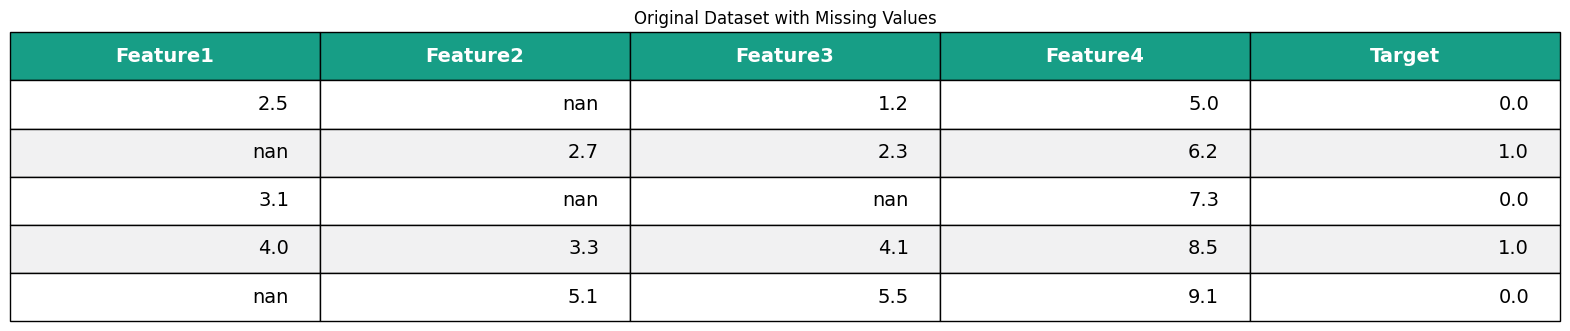

In [4]:
# Render the original data table
ax = render_mpl_table(df)
plt.title("Original Dataset with Missing Values")
plt.show()

## Step 4: Deletion Method

One approach to handle missing data is to simply remove rows that contain missing values.

In [5]:
# Deletion Method: Dropping rows with missing values
df_deletion = df.dropna()
print("Data after deletion of rows with missing values:\n", df_deletion)

Data after deletion of rows with missing values:
    Feature1  Feature2  Feature3  Feature4  Target
3       4.0       3.3       4.1       8.5       1


## Step 5: Mean Imputation

Mean imputation replaces missing values with the mean of the respective feature.

In [6]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy="mean")
df_mean_imputed = df.copy()
df_mean_imputed.iloc[:, :4] = mean_imputer.fit_transform(
    df_mean_imputed[["Feature1", "Feature2", "Feature3", "Feature4"]]
)
print("\nData after mean imputation:\n", df_mean_imputed)


Data after mean imputation:
    Feature1  Feature2  Feature3  Feature4  Target
0       2.5       3.7     1.200       5.0       0
1       3.2       2.7     2.300       6.2       1
2       3.1       3.7     3.275       7.3       0
3       4.0       3.3     4.100       8.5       1
4       3.2       5.1     5.500       9.1       0


## Step 6: Visualize Mean Imputed Data

Let's visualize the dataset after mean imputation.

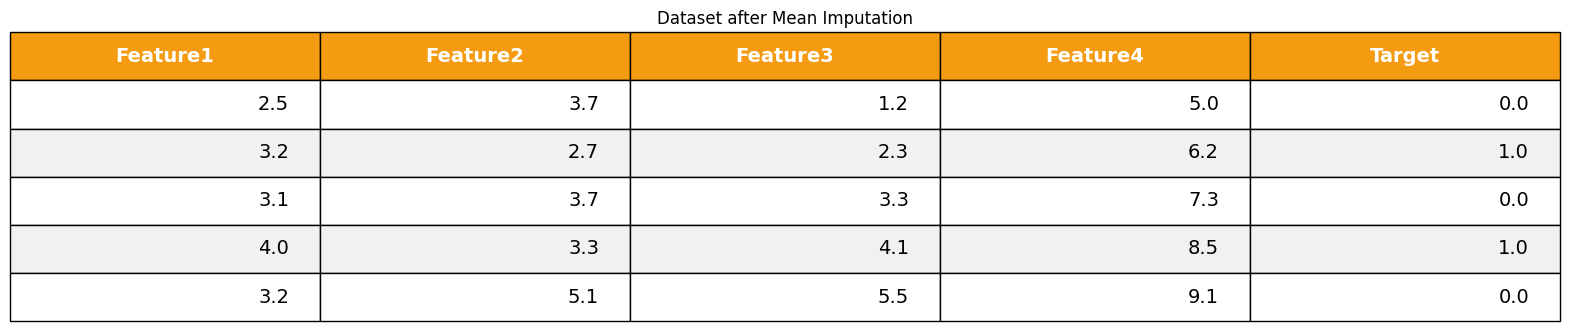

In [7]:
# Render the mean imputed data table
ax = render_mpl_table(df_mean_imputed, header_color="#F59B11")
plt.title("Dataset after Mean Imputation")
plt.show()

## Step 7: KNN Imputation

KNN imputation uses the k-nearest neighbors to estimate missing values based on similarity.

In [8]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = df.copy()
df_knn_imputed.iloc[:, :4] = knn_imputer.fit_transform(
    df_knn_imputed.iloc[:, :4]
)
print("\nData after KNN imputation:\n", df_knn_imputed)


Data after KNN imputation:
    Feature1  Feature2  Feature3  Feature4  Target
0      2.50       3.0       1.2       5.0       0
1      2.80       2.7       2.3       6.2       1
2      3.10       3.0       3.2       7.3       0
3      4.00       3.3       4.1       8.5       1
4      3.55       5.1       5.5       9.1       0


## Step 8: Visualize KNN Imputed Data

Let's visualize the dataset after KNN imputation.

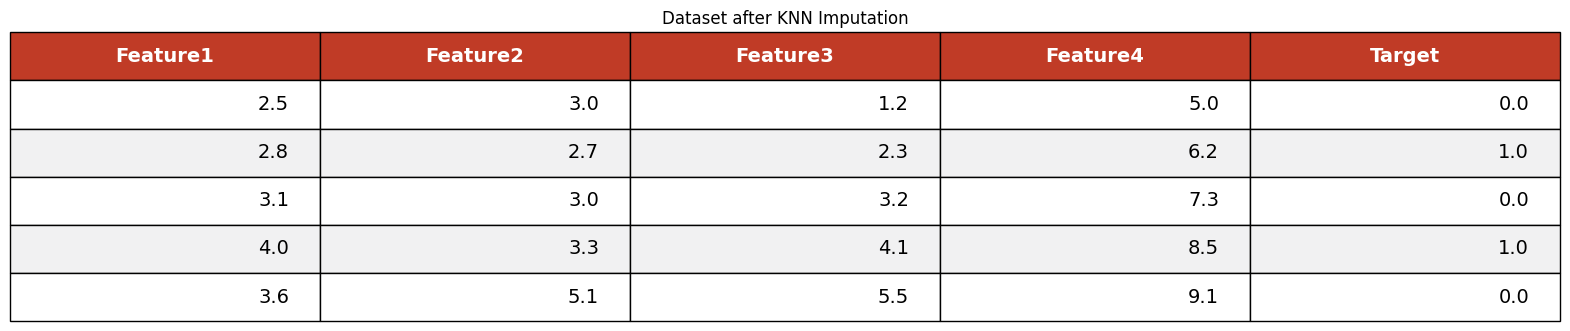

In [9]:
# Render the KNN imputed data table
ax = render_mpl_table(df_knn_imputed, header_color="#C03B26")
plt.title("Dataset after KNN Imputation")
plt.show()

## Summary

In this notebook, we explored three main approaches to handle missing data:

1. **Deletion**: Simply removing rows with missing values
   - Pros: Simple and preserves data integrity
   - Cons: Loss of data, potential bias if missing data is not random

2. **Mean Imputation**: Replacing missing values with the mean of the feature
   - Pros: Preserves sample size, simple to implement
   - Cons: Reduces variance, doesn't consider relationships between features

3. **KNN Imputation**: Using k-nearest neighbors to estimate missing values
   - Pros: Considers relationships between features, more sophisticated
   - Cons: Computationally expensive, sensitive to the choice of k and distance metric

Each method has its trade-offs, and the choice depends on the nature of your data and the specific requirements of your analysis.